# Application to Image Transformations


In [1]:
1+1

2

## Example 1 - Apply matrix transformation to image matrix

Suppose we want to rotate the following triangle by $\pi/2$ (or $90^\circ$) counter-clockwise around the origin.

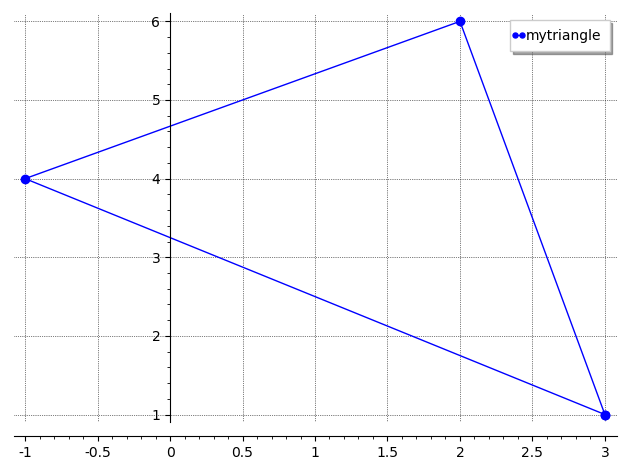

In [2]:
# create a list of points (vertices of a triangle)
pts = [(3,1),(2,6),(-1,4),(3,1)]

# plot this list of points
list_plot(pts,plotjoined=True,gridlines=True,marker='o',legend_label="mytriangle")

In [35]:
A = matrix(2,2,[0,-1,1,0])
print(A)
P = matrix(2,4,[3,2,-1,3,1,6,4,1])
print(P)
AP = A*P
print(f'A*P=\n{AP}')

[ 0 -1]
[ 1  0]
[ 3  2 -1  3]
[ 1  6  4  1]
A*P=
[-1 -6 -4 -1]
[ 3  2 -1  3]


This means the point (3,1) is mapped to (-1,3), the point (2,6) is mapped to (-6,2) etc. Thus the columns of $AP$ are coordinates of the new triangle under this transformation.

Now, let's plot the resulting triangle given by image matrix $AP$.

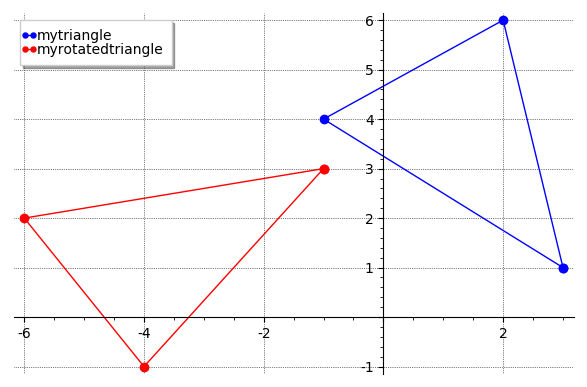

In [36]:
def mat_to_pts(mat):
    "convert each column of the matrix mat into a points so we can plot them"
    return list(map(lambda col: (col[0],col[1]), mat.columns()))
    
pts1 = mat_to_pts(P) # vertices of mytriangle
pts2 = mat_to_pts(AP) # vertices of the new mytriangle

g1 = list_plot(pts1,plotjoined=True,gridlines=True,marker='o',color='blue',legend_label="mytriangle")
g2 = list_plot(pts2,plotjoined=True,gridlines=True,marker='o',color='red',legend_label="myrotatedtriangle")
show(g1+g2)


## Utility functions

For convenience, let's define a function that will return the plot of points (columns) of the input matrix (or matrices)

In [37]:
def plot_image_matrix(*matrices,colors=[],labels=[],includeorigin=True):
    """Plot points in matrices. Return graphic object containing the pictures, use show(..) to see it"""
    if colors == []:
        colors = ['blue','red','purple','green','brown'] # default colors list
    if labels == []:
        labels = ['matrix' + str(i) for i in range(len(matrices))]
    if includeorigin:
        g = list_plot([(0,0)],color='white') # add the invisible point at origin so we see axes
    else:
        g = list_plot([])
    for i in range(len(matrices)):
        mat = matrices[i]
        ptstoplot = list(map(lambda col: (col[0],col[1]), mat.columns())) # use only first two coordinates
        lb = labels[i]
        c = colors[i]
        g = g + list_plot(ptstoplot,plotjoined=True,
                          marker='o',legend_label=lb,color=c)
    return g

Since we use the rotation matrix oftern, we will define a function that returns the rotation matrix by angle $\theta$ counterclockwise as well.

In [38]:
def rotmat(theta):
    """Rotation matrix by angle t radians counter-clockwise around the origin"""
    col1 = (cos(theta),sin(theta))
    col2 = (-sin(theta),cos(theta))
    return matrix([col1,col2]).T

In [9]:
rotmat(-pi/2)

[ 0  1]
[-1  0]

Now we can do Example 1 again with with the following convenient commands:

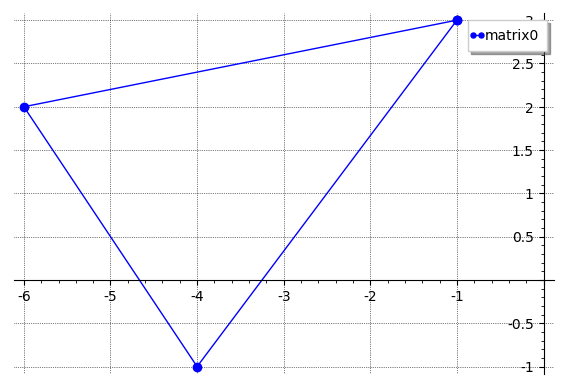

In [39]:
#Step 1 > define vertices of my triangle, note that the last point is same as first point to close the loop
pts = [(3,1),(2,6),(-1,4),(3,1)]

#Setp 2 > create the image matrix whose columns of the points above
P = matrix(pts).T

#Step 3 > create the resulting image matrix
AP = A*P

#Step 4 > plot both images on the same plane
pic = plot_image_matrix(AP)
show(pic,gridlines=true,aspect_ratio=1)

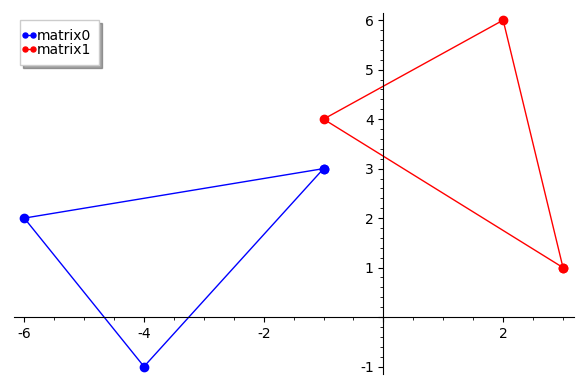

In [40]:
plot_image_matrix(AP,P)

**Practice.** Can you reflect `mytriangle` about $y$-axis?

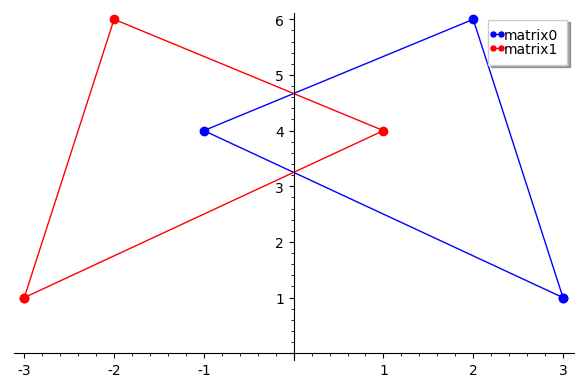

In [41]:
A = matrix(2,2,[-1,0,
                0,1])
P1=A*P
plot_image_matrix(P,P1)


**Practice.** Can you reflect `mytriangle` about the line $y=x$?

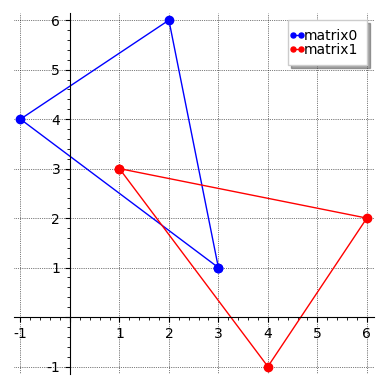

In [42]:
A = matrix(2,2,[0,1,
                1,0])
P1 = A*P
pic = plot_image_matrix(P,P1)
show(pic,gridlines=true,aspect_ratio=1)

**Practice.** Can you project `mytriangle` onto the $x$-axis?

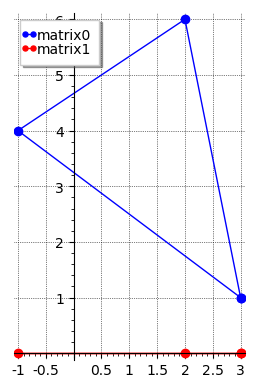

In [43]:
A = matrix(2,2,[1,0,
                0,0])
P1 = A*P
pic = plot_image_matrix(P,P1)
show(pic,gridlines=true,aspect_ratio=1)


## Example 2 - Effect of matrix transformations

The following points give the letter "M". Run the codes to see it.

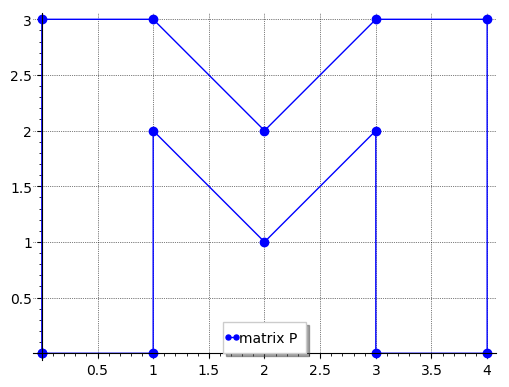

In [23]:
pts = [(0.,0.) ,(0.,3.) ,(1.,3.) ,(2.,2.) ,(3.,3.) ,(4.,3.) ,(4.,0.),(3.,0.) ,(3.,2.) ,(2.,1.) ,(1.,2.) ,(1.,0.) ,(0,0)]
P = matrix(pts).T

pic = plot_image_matrix(P,labels=['matrix P'])
show(pic,gridlines=true,aspect_ratio=1)

The following matrices are to be applied to the image matrix $P$ of the letter "M". Can you match which picture is the result of which matrix?

$$A1 = \begin{pmatrix}2&0\\0&1\end{pmatrix},\, A2= \begin{pmatrix}1&0\\0&-3\end{pmatrix},\, A3=\begin{pmatrix}2&0\\0&-3\end{pmatrix},\, A4=\begin{pmatrix}1&1\\0&1\end{pmatrix}$$

<img src="https://prmath.github.io/icma224web/images/letter-m-transforms.png">


Let's see the effect of each matrix.

$A1 = \begin{pmatrix}2&0\\0&1\end{pmatrix}$

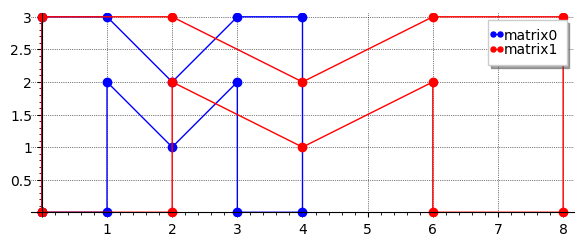

In [24]:
A1 = matrix(2,2,[2,0,
                 0,1])
P1 = A1*P
pic = plot_image_matrix(P,P1)
show(pic,gridlines=true,aspect_ratio=1)

$A2= \begin{pmatrix}1&0\\0&-3\end{pmatrix}$

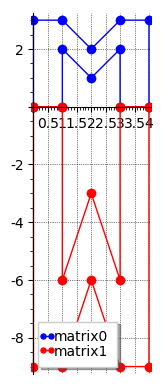

In [25]:
A2 = matrix(2,2,[1,0,
                 0,-3])
P2 = A2*P
pic = plot_image_matrix(P,P2)
show(pic,gridlines=true,aspect_ratio=1)

$A3=\begin{pmatrix}2&0\\0&-3\end{pmatrix}$

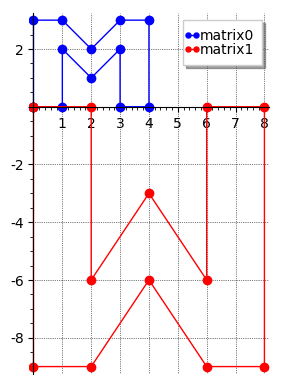

In [26]:
A3 = matrix(2,2,[2,0,
                 0,-3])
P3 = A3*P
pic = plot_image_matrix(P,P3)
show(pic,gridlines=true,aspect_ratio=1)


$A4=\begin{pmatrix}1&1\\0&1\end{pmatrix}$

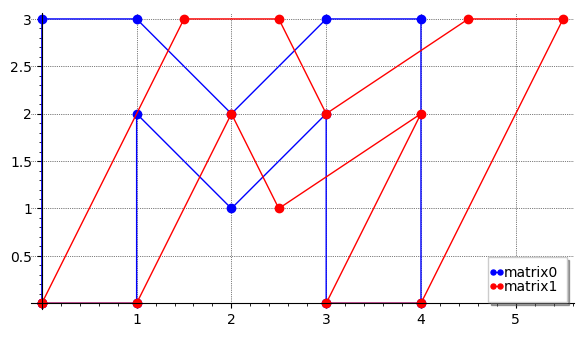

In [29]:
A4 = matrix(2,2,[1,0.5,
                 0,1])
P4 = A4*P
pic = plot_image_matrix(P,P4)
show(pic,gridlines=true,aspect_ratio=1)


In [32]:
2**4

16

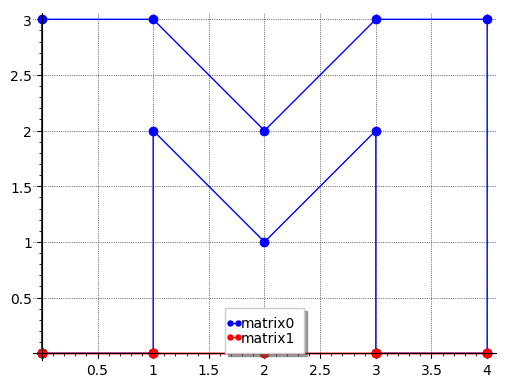

In [33]:
# project letter M onto x-axis.
plot_image_matrix(P)
A = matrix(2,2,[1,0,
                0,0])
P1= A*P
pic = plot_image_matrix(P,P1)
show(pic,gridlines=true,aspect_ratio=1)


## Example 3 - Composing linear transformations

Let's reflect the letter "M" (defined before) about the $x$-axis and then reflect the resulting image about the line $y=x$. 

What is the matrix $A$ such that $AP$ gives the final image?

In [ ]:



pic = plot_image_matrix( )
show(pic,gridlines=true,aspect_ratio=1)

In [ ]:


print(f'A = \n{A}')
pic = plot_image_matrix( )
show(pic,gridlines=true,aspect_ratio=1)

## Exercise

Let $P$ be an image matrix of the following "stealth bomber". (Run the codes to see the picture.)

In [ ]:
pts =[(-2.5,0.5) ,(-3,0) ,(-2,2) ,(-1,0) ,(-1.5,0.5) ,(-2,0.25),(-2.5,0.5)]
P = matrix(pts).T
pic = plot_image_matrix(P)
show(pic,gridlines=true,aspect_ratio=1)

Perform the following actions consecutively (each action is applied to the previous result). 
1. Reflect about the $x$-axis.
2. Rotate by $60^\circ$ couter-clockwise around the origin.
3. Reflect about the line $y=x$.

Create a picture of this sequence of transformations. Find the matrix $A$ such that $AP$ gives the final image.

In [ ]:




pic = plot_image_matrix( )
show(pic,gridlines=true,aspect_ratio=1)

In [ ]:



pic = plot_image_matrix( )
show(pic,gridlines=true,aspect_ratio=1)